## Neuronal segmentation

preparing the data


In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tifffile import imread, imsave
import napari
import glob
import json


In [2]:
data_path = "../dl-course-2022/project9_classification_of_neuronal_types"
path_mask = os.path.join(data_path, "masks/complete_masks/manually_corrected")

In [4]:
files = sorted(glob.glob(path_mask+'/*.tif'))
print(files)

['../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/fish2_nasal_15-75z_corrected.tif', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/fish2_nasal_20-80z_corrected.tif', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/fish2_nasal_25-85z_corrected.tif', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/fish2_temporal_10-70z_corrected.tif', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/fish2_temporal_20-81z_corrected.tif', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/fish2_temporal_5-65z_corrected.tif']


In [5]:
labels = sorted(glob.glob(path_mask+'/labels/*.csv'))
print(labels)

['../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/fish2_nasal_15-75z_corrected.csv', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/fish2_nasal_20-80z_corrected.csv', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/fish2_nasal_25-85z_corrected.csv', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/fish2_temporal_10-70z_corrected.csv', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/fish2_temporal_20-81z_corrected.csv', '../dl-course-2022/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/fish2_temporal_5-65z_corrected.csv']


In [6]:
## read the data
masks = list(map(imread, files))
print(f"number of masks = {len(masks)}")
print(f"shape = {masks[0].shape}")

number of masks = 6
shape = (61, 330, 300)


In [12]:
def mp(arr, dic):
    arr_copy = np.zeros(arr.shape);
    arr_copy = arr_copy + 8 # set default value to be 8
    for k, v in dic.items():
        arr_copy[arr==k] = v
    return arr_copy

In [23]:
classes = {'RGC': 1, 'BC': 2, 'PR': 3, 'AC': 4, 'HC': 5, 'LENS': 6, 'RPE': 7, np.nan : 8}
new_masks= []
for label, mask in zip(labels, masks):
    df = pd.read_csv(label, sep=';')
    converted_classes = df['class'].map(classes)
    ids = {k:v for k,v in zip(df['label'], converted_classes)}
    ids[0] = 0
    mask_new = mp(mask, ids)
    new_masks.append(mask_new)
    if not os.path.exists("labels"):
        os.mkdir("labels")
    with open('labels/'+os.path.basename(label)[:-3]+'json', 'w') as fp:
        json.dump(ids, fp)
    
    
    
    
    
    

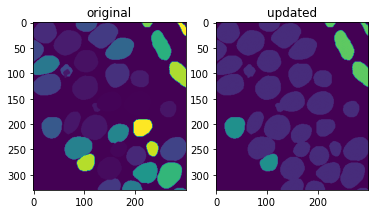

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(masks[0][10])
ax[0].set_title("original")
ax[1].imshow(new_masks[0][10])
ax[1].set_title("updated")
plt.show()

In [20]:
import napari
try:
    viewer = napari.view_image(new_masks[0])
except:
    pass